**Project:** Data Mining I (2025/26)

**Group:** 15

**Members:**
- Beatriz Boura - 20250272
- Dinis Gaspar - 20221869
- Leonor Cardoso - 20250546
- Margarida Cruz - 20221929

**Table of contents**<a id='toc0_'></a>    
1. [Imports](#toc1_)    
2. [Introduction](#toc2_)    
3. [Individual Cluster Analysis](#toc3_)    
3.1. [A lot of pets](#toc3_1_)    
3.2. [Costly Commutes](#toc3_2_)    
3.3. [Long Absences](#toc3_3_)    
3.4. [Near Weekend absences](#toc3_4_)    
3.5. [No Kids or pets, High BMI](#toc3_5_)    
3.6. [Oldest employees](#toc3_6_)    
3.7. [Short but expensive commutes](#toc3_7_)    
3.8. [Winter Absences](#toc3_8_)    
3.9. [Younger employees](#toc3_9_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[Imports](#toc0_)

In [1]:
import pandas as pd
from utils_clustering import (boxplot_grid, plot_comparing_avr_clusters)
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format
pd.set_option("display.max_columns", None)

In [2]:
%cd ..
%cd Datasets
classified_data = pd.read_csv('classified_data.csv', index_col=0)
classified_data.head()


c:\Users\dinis\OneDrive\Ambiente de Trabalho\Faculdade - MGI-BI\1º ano\1º Semestre\Data Mining I\Project\DM_Project
c:\Users\dinis\OneDrive\Ambiente de Trabalho\Faculdade - MGI-BI\1º ano\1º Semestre\Data Mining I\Project\DM_Project\Datasets


,transportation_expense,disciplinary_failure,number_of_children,number_of_pets,body_mass_index,absenteeism_time_in_hours,age,higher_education,commute_cost_per_km,risk_behavior,month_January,month_February,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December,is_mid_week,is_near_weekend,is_weekend,reason_Acute Disease,reason_Chronic Disease,reason_Maternity/Pregnancy-Related,reason_Medical Care,reason_Mental Disease,reason_Unjustified absence,reason_Unspecified,Final_Cluster
0,289.00,0.00,2.00,1.00,30.00,4.00,33.00,0.00,8.03,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,Oldest employees
1,118.00,1.00,1.00,0.00,31.00,0.00,50.00,0.00,9.08,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,Short but expensive commutes
2,179.00,0.00,0.00,0.00,31.00,2.00,38.00,0.00,3.51,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,"No Kids or pets, High BMI"
3,279.00,0.00,2.00,0.00,24.00,4.00,39.00,0.00,30.00,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,Costly Commutes
4,289.00,0.00,2.00,1.00,30.00,2.00,33.00,0.00,8.03,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,Oldest employees


In [3]:
final_cluster_centroids = classified_data.groupby('Final_Cluster').mean().reset_index()
final_cluster_centroids.T

,0,1,2,3,4,5,6,7,8
Final_Cluster,A lot of pets,Costly Commutes,Long Absences,Near Weekend absences,"No Kids or pets, High BMI",Oldest employees,Short but expensive commutes,Winter Absences,Younger employees
transportation_expense,321.33,296.13,219.18,250.11,179.00,267.44,125.28,186.19,221.84
disciplinary_failure,0.10,0.13,0.00,0.06,0.02,0.10,0.06,0.01,0.02
number_of_children,1.15,1.13,1.32,2.84,0.00,1.39,0.70,0.33,1.13
number_of_pets,4.00,0.35,0.29,0.13,0.00,0.84,0.01,0.00,2.00
body_mass_index,26.02,26.26,26.05,23.67,31.00,29.43,28.26,20.68,24.26
absenteeism_time_in_hours,5.77,5.58,26.32,5.38,3.42,4.22,3.20,3.90,3.74
age,32.42,34.04,38.50,36.90,38.00,41.53,40.62,31.69,28.44
higher_education,0.17,0.67,0.07,0.10,0.00,0.00,0.00,0.79,0.04
commute_cost_per_km,6.84,22.05,10.58,6.88,3.51,9.75,11.05,7.62,8.74


# 2. <a id='toc2_'></a>[Introduction](#toc0_)

This is the final notebook of our project. We have obtained clusters for all of our observations in the "Clustering" notebook. We will perform a final analysis of those clusters. To that end we have imported our classifed_data which contains our analytical dataset with associated final cluster labels, we have then obtained the cluster centroids. Below is a bar chart which shows us the size of each cluster.

In [4]:
cluster_counts = classified_data['Final_Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Final_Cluster', 'Count']
fig_bar = px.bar(cluster_counts, x='Final_Cluster', y='Count',
        title='Number of Observations per Cluster', color='Final_Cluster')
fig_bar.update_layout(showlegend=False)

Our largest cluster is "Oldest Employees" containing 135 absences and our smallest cluster is "A lot of pets" with 48 absences. Overall, 3 of our clusters contain above 100 absences and only the smallest contains under 50. On the whole, the cluster distribution, while not uniform, is also not very disperse.

# 3. <a id='toc3_'></a>[Individual Cluster Analysis](#toc0_)

In this stage we will analyze and describe each cluster individually, we will also add the descrption to the cluster centers dataset that we have. Since we are aiming to perform the clustering analysis between absence related information and information regarding the employee committing the absence, we will search for patterns in both sets of characteristics, as these may lead to deeper insights. <p> To help us understand our clusters, in addition to the cluster centroids, a grid of boxplots split by the cluster labels will be used. A visualization which allows for the comparison of cluster mean values for each features will also be used <p>
**Note:** We will exclude the binary variables (both true binary variables and dummy encondings) from the boxplots, as they aren't "true" numerical variables. When we look at the cluster centers of each specific cluster these binary variables, averaged out, give us proportions per cluster. 

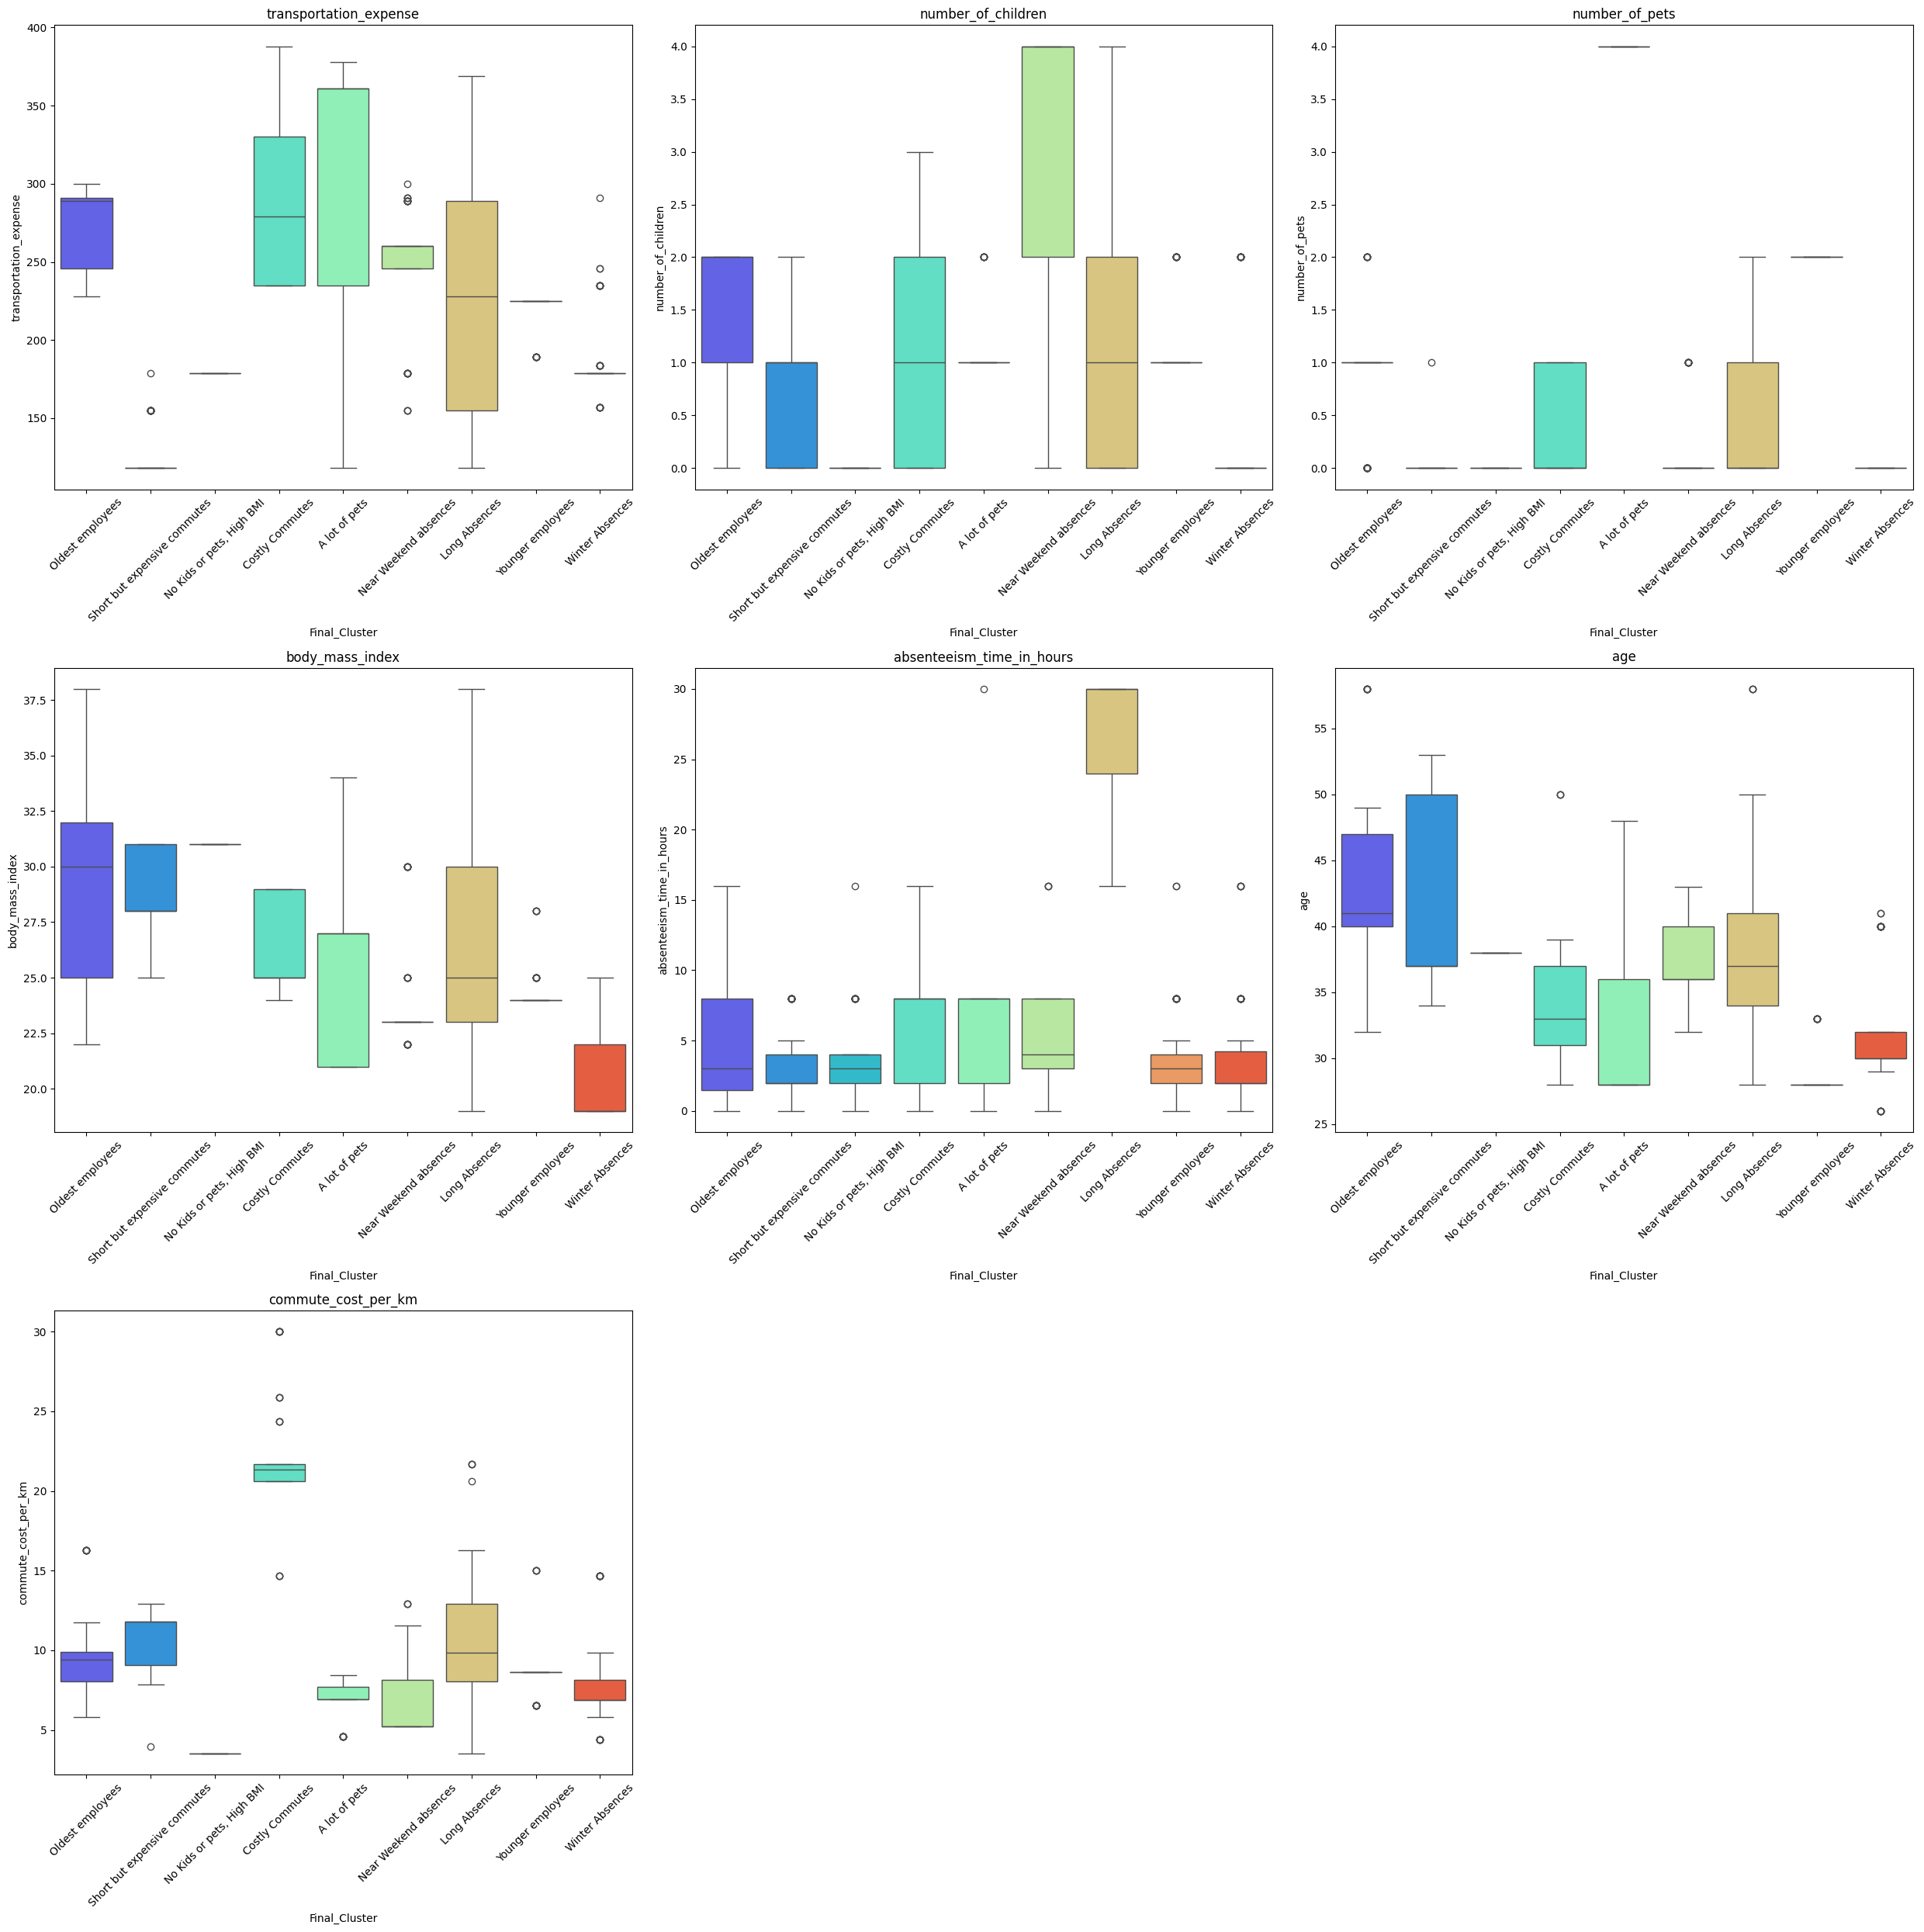

In [5]:
vars_for_boxplot = list(classified_data.columns)[:10]
vars_for_boxplot.remove('disciplinary_failure')
vars_for_boxplot.remove('higher_education')
vars_for_boxplot.remove('risk_behavior')
boxplot_grid(classified_data, vars_for_boxplot, 'Final_Cluster')

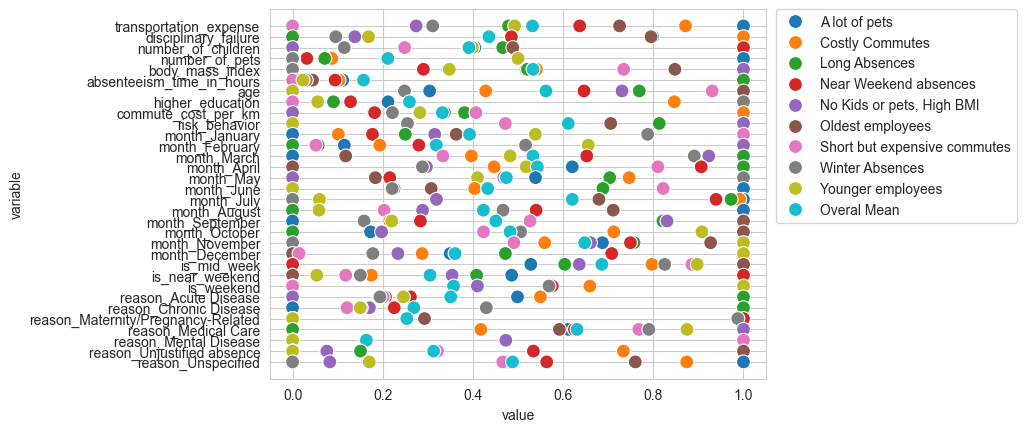

In [6]:
plot_comparing_avr_clusters(final_cluster_centroids, 'Final_Cluster')


## 3.1. <a id='toc3_1_'></a>[A lot of pets](#toc0_)


In [7]:
final_cluster_centroids[final_cluster_centroids['Final_Cluster'] == 'A lot of pets'].T

,0
Final_Cluster,A lot of pets
transportation_expense,321.33
disciplinary_failure,0.10
number_of_children,1.15
number_of_pets,4.00
body_mass_index,26.02
absenteeism_time_in_hours,5.77
age,32.42
higher_education,0.17
commute_cost_per_km,6.84


The defining characteristics of the "A lot of pets" cluster:
+ Employees that did the absences in this cluster have a lot (the highest amount by far) of pets, on average 4.
+ Highest transportation expense, but reasonable commute cost per Km, indicating these are simply long commutes.
+ A low rate of higher education, just 17%. Although this rate is actually third highest across clusters, but a long margin away from the top two, over 60%.
+ The yearly distribution of absences in this cluster has a clear summer peak, 51% of absences occur in the summer.
+ This cluster has a slightly higher than average rate of near weekend absences at 48%, values tend to be around 30/35%.
+ The distribution of absence justifications for this cluster is relatively normal, within the general expectation.
+ On average, absences in this cluster amount to almost a full working day (nearly 6 hours). 

For the “A lot of pets” cluster, employees tend to experience long commutes, significant personal responsibilities, lower education levels, high transportation costs, and noticeable summer absences. Supporting this group may involve flexible scheduling, commute assistance, development pathways, proactive summer planning, and positive attendance incentives to reduce unpredictability and improve overall well-being.

In [8]:
final_cluster_centroids.loc[final_cluster_centroids['Final_Cluster'] == 'A lot of pets', 'Description'] = """The defining characteristics of the "A lot of pets" cluster:
+ Employees that did the absences in this cluster have a lot (the highest amount by far) of pets, on average 4.
+ Highest transportation expense, but reasonable commute cost per Km, indicating these are simply long commutes.
+ A low rate of higher education, just 17%. Although this rate is actually third highest across clusters, but a long margin away from the top two, over 60%.
+ The yearly distribution of absences in this cluster has a clear summer peak, 51% of absences occur in the summer.
+ This cluster has a slightly higher than average rate of near weekend absences at 48%, values tend to be around 30/35%.
+ The distribution of absence justifications for this cluster is relatively normal, within the general expectation.
+ On average, absences in this cluster amount to almost a full working day (nearly 6 hours). 

For the “A lot of pets” cluster, employees tend to experience long commutes, significant personal responsibilities,
lower education levels, high transportation costs, and noticeable summer absences. Supporting this group may involve
flexible scheduling, commute assistance, development pathways, proactive summer planning, and positive attendance
incentives to reduce unpredictability and improve overall well-being.
"""

## 3.2. <a id='toc3_2_'></a>[Costly Commutes](#toc0_)

In [9]:
final_cluster_centroids[final_cluster_centroids['Final_Cluster'] == 'Costly Commutes'].T

,1
Final_Cluster,Costly Commutes
transportation_expense,296.13
disciplinary_failure,0.13
number_of_children,1.13
number_of_pets,0.35
body_mass_index,26.26
absenteeism_time_in_hours,5.58
age,34.04
higher_education,0.67
commute_cost_per_km,22.05


The "Costly Commutes" cluster can be described by:
+ The employees committing the absences having by far the highest, average commute cost per Km at 22BRL/Km, 
when other clusters are generally below 10BRL/Km, although only the second highest average transportation expense.
+ The second highest rate of unjustified absences (9%).
+ The second highest rate of absences due to acute diseases (33%), compared to around 20% for most other clusters.
+ An average distribution of absences throughout the week and the year, when compared to other clusters.
+ Overall, the employees doing these absences have one of the lowest presences of risk behaviors, just 29%.
+ The second highest rate of higher education at 67%, much higher than all clusters except one.
+ The average length of absences for this cluster is close to 6 hours, meaning almost a full working day.
+ The highest rate of absences which are considered disciplinary failures (13%), although there are other clusters with only slightly lower rates.

Regarding the “Costly Commutes” cluster, workers face extremely high commuting costs and elevated unjustified or acute-illness absences, despite low presence of risk behaviors and high education levels. Addressing their needs could include targeted transportation aid, clear attendance reinforcement, preventive health initiatives, and individualized follow-up to boost predictability and well-being.


In [10]:
final_cluster_centroids.loc[final_cluster_centroids['Final_Cluster'] == 'Costly Commutes', 'Description'] = """The "Costly Commutes" cluster can be described by:
+ The employees committing the absences having by far the highest, average commute cost per Km at 22 BRL/Km, 
when other clusters are generally below 10 BRL/Km, although only the second highest average transportation expense.
+ The second highest rate of unjustified absences (9%).
+ The second highest rate of absences due to acute diseases (33%), compared to around 20% for most other clusters.
+ An average distribution of absences throughout the week and the year, when compared to other clusters.
+ Overall, the employees doing these absences have one of the lowest presences of risk behaviors, just 29%.
+ The second highest rate of higher education at 67%, much higher than all clusters except one.
+ The average length of absences for this cluster is close to 6 hours, meaning almost a full working day.
+ The highest rate of absences which are considered disciplinary failures (13%), although there are other clusters with only slightly lower rates.

Regarding the “Costly Commutes” cluster, workers face extremely high commuting costs and elevated unjustified or
acute-illness absences, despite low presence of risk behaviors and high education levels. Addressing their needs
could include targeted transportation aid, clear attendance reinforcement, preventive health initiatives, and
individualized follow-up to boost predictability and well-being.
"""

## 3.3. <a id='toc3_3_'></a>[Long Absences](#toc0_)

In [11]:
final_cluster_centroids[final_cluster_centroids['Final_Cluster'] == 'Long Absences'].T

,2
Final_Cluster,Long Absences
transportation_expense,219.18
disciplinary_failure,0.00
number_of_children,1.32
number_of_pets,0.29
body_mass_index,26.05
absenteeism_time_in_hours,26.32
age,38.50
higher_education,0.07
commute_cost_per_km,10.58


The "Long Absences" group of absences can be defined by:
+ By far the highest average absence length, at ~26 hours, which is over 3 working days. Second highest is under 1 working day.
+ The highest rate, by far, of both acute (52%) and chronic disease (32%) related absences, accounting for most absences in this cluster, which can somewhat explain the extreme length of these absences.
+ One of the highest average ages for the employees performing the absence.
+ Being the only cluster without absences in August, other than that the yearly distribution is mostly normal.
+ The distribution of the absences throughout the week is not out of the ordinary.
+ A moderately high commute cost per Km at 10.60 BRL/Km, being one of only 3 clusters above 10, when most clusters are around 6 to 7.
+ A low rate of higher education, just 7%.

With the “Long Absences” cluster, the defining feature is prolonged, medically driven absences linked to high rates of acute and chronic illness among an older workforce. Offering stronger occupational health programs, chronic condition management, ergonomic evaluations, and structured return to work processes can help reduce extended absence durations.

In [12]:
final_cluster_centroids.loc[final_cluster_centroids['Final_Cluster'] == 'Long Absences', 'Description'] = """The "Long Absences" group of absences can be defined by:
+ By far the highest average absence length, at ~26 hours, which is over 3 working days. Second highest is under 1 working day.
+ The highest rate, by far, of both acute (52%) and chronic disease (32%) related absences, accounting for most absences in this cluster, which can somewhat explain the extreme length of these absences.
+ One of the highest average ages for the employees performing the absence.
+ Being the only cluster without absences in August, other than that the yearly distribution is mostly normal.
+ The distribution of the absences throughout the week is not out of the ordinary.
+ A moderately high commute cost per Km at 10.60 BRL/Km, being one of only 3 clusters above 10, when most clusters are around 6 to 7.
+ A low rate of higher education, just 7%.

With the “Long Absences” cluster, the defining feature is prolonged, medically driven absences linked to high
rates of acute and chronic illness among an older workforce. Offering stronger occupational health programs,
chronic condition management, ergonomic evaluations, and structured return to work processes can help reduce
extended absence durations.
"""

## 3.4. <a id='toc3_4_'></a>[Near Weekend absences](#toc0_)

In [13]:
final_cluster_centroids[final_cluster_centroids['Final_Cluster'] == 'Near Weekend absences'].T

,3
Final_Cluster,Near Weekend absences
transportation_expense,250.11
disciplinary_failure,0.06
number_of_children,2.84
number_of_pets,0.13
body_mass_index,23.67
absenteeism_time_in_hours,5.38
age,36.90
higher_education,0.10
commute_cost_per_km,6.88


We can explain the "Near Weekend absences" cluster by the following main points:
+ The highest rate of near weekend absences by a decent margin at 70%, with all other cluster below 50%.
+ Consequently, the lowest rate of mid-week absences.
+ A relatively expected yearly distribution of absences.
+ An even (in the general context) distribution of absence justifications.
+ Absences being over 5 hours on average, which exceeds half of a working day.
+ A 100% rate of risk behaviors, which is not unique to this cluster.
+ A low rate of higher educated employees, only 10%, it is however worth mentioning that some other clusters have even lower rates.
+ The second lowest average BMI of employees at 23.7, one of only 3 clusters that falls into the "Healthy weight" class of BMI.

For the “Near Weekend Absences” cluster, employees consistently take time off around weekends, tend to have longer absence durations, display universal risk behaviors, and generally have lower education levels. Improving consistency can be achieved by reinforcing attendance policies, using targeted behavioral interventions, clearly communicating expectations, and offering development-related support.


In [14]:
final_cluster_centroids.loc[final_cluster_centroids['Final_Cluster'] == 'Near Weekend absences', 'Description'] = """We can explain the "Near Weekend absences" cluster by the following main points:
+ The highest rate of near weekend absences by a decent margin at 70%, with all other cluster below 50%.
+ Consequently, the lowest rate of mid-week absences.
+ A relatively expected yearly distribution of absences.
+ An even (in the general context) distribution of absence justifications.
+ Absences being over 5 hours on average, which exceeds half of a working day.
+ A 100% rate of risk behaviors, which is not unique to this cluster.
+ A low rate of higher educated employees, only 10%, it is however worth mentioning that some other clusters have even lower rates.
+ The second lowest average BMI of employees at 23.7, one of only 3 clusters that falls into the "Healthy weight" class of BMI.

For the “Near Weekend Absences” cluster, employees consistently take time off around weekends, tend to have
longer absence durations, display universal risk behaviors, and generally have lower education levels. Improving
consistency can be achieved by reinforcing attendance policies, using targeted behavioral interventions, clearly
communicating expectations, and offering development-related support.
"""

## 3.5. <a id='toc3_5_'></a>[No Kids or pets, High BMI](#toc0_)

In [15]:
final_cluster_centroids[final_cluster_centroids['Final_Cluster'] == 'No Kids or pets, High BMI'].T

,4
Final_Cluster,"No Kids or pets, High BMI"
transportation_expense,179.00
disciplinary_failure,0.02
number_of_children,0.00
number_of_pets,0.00
body_mass_index,31.00
absenteeism_time_in_hours,3.42
age,38.00
higher_education,0.00
commute_cost_per_km,3.51


We can represent the "No Kids or pets, High BMI" set of absences with a few main ideas:
+ The employees doing these absences have no children or pets at all (average of 0 for both variables).
+ The highest average body mass index at 31, which already classifies as class 1 obesity, it is the only group to reach this level, all others are below 30.
+ The highest rate of medical care related absences at 74%, where the second highest is below 60% and in general values tend to be arounv 40-50%.
+ A disproportionate peak of absence in February, with almost a quarter (23%) of absences occurring in that month.
+ Overall low summer absence rate (18%), but high winter absence rate (43%).
+ An expected distribution of absences throughout the week.
+ None of these absences being done by employees with higher education, 0% rate of higher education.

In the “No children or pets, high BMI” group, absences are largely linked to health issues, given that this group has the highest BMI levels and sharp seasonal increases, particularly in February, among employees without higher education. Strengthening workplace health initiatives, emphasizing prevention, and providing personalized wellness guidance can help address these challenges.


In [16]:
final_cluster_centroids.loc[final_cluster_centroids['Final_Cluster'] == 'No Kids or pets, High BMI', 'Description'] = """We can represent the "No Kids or pets, High BMI" set of absences with a few main ideas:
+ The employees doing these absences have no children or pets at all (average of 0 for both variables).
+ The highest average body mass index at 31, which already classifies as class 1 obesity, it is the only group to reach this level, all others are below 30.
+ The highest rate of medical care related absences at 74%, where the second highest is below 60% and in general values tend to be arounv 40-50%.
+ A disproportionate peak of absence in February, with almost a quarter (23%) of absences occurring in that month.
+ Overall low summer absence rate (18%), but high winter absence rate (43%).
+ An expected distribution of absences throughout the week.
+ None of these absences being done by employees with higher education, 0% rate of higher education.

In the “No children or pets, high BMI” group, absences are largely linked to health issues,
given that this group has the highest BMI levels and sharp seasonal increases, particularly
in February, among employees without higher education. Strengthening workplace health initiatives,
emphasizing prevention, and providing personalized wellness guidance can help address these challenges.
"""

## 3.6. <a id='toc3_6_'></a>[Oldest employees](#toc0_)

In [17]:
final_cluster_centroids[final_cluster_centroids['Final_Cluster'] == 'Oldest employees'].T

,5
Final_Cluster,Oldest employees
transportation_expense,267.44
disciplinary_failure,0.10
number_of_children,1.39
number_of_pets,0.84
body_mass_index,29.43
absenteeism_time_in_hours,4.22
age,41.53
higher_education,0.00
commute_cost_per_km,9.75


The "Oldest employees" cluster has some defining characteristics:
+ The absences are connected to, on average, the oldest employees out of all clusters, on average 42 years old which is a couple of years older than the next oldest cluster and quite a bit higher than the general mid to high thirties. Interestingly there are clusters with higher maximum ages, but lower averages.
+ The third highest transportation expense on average, with a moderate cost per Km. Both are slightly above the general values.
+ None of the absences in this cluster were done by employees with higher education.
+ The large majority of absences are midweek, 73% which is the highest among all cluster and the only cluster above 70%.
+ The distribution of absences for this cluster across the year is quite uniform, with slighly lower values in winter months.
+ The distribution of absence justifications for this cluster is relatively normal, within the general expectation.
+ The average length of absences for this cluster is roughly half of a working day which is around the expected value, looking at the general values.
+ The highest rate of unjustified absences at 12%, being the only cluster above 10%.

Among the “Oldest Employees” cluster, workers show elevated unjustified absences, face high transport costs, and lack higher education, with most absences occurring midweek and lasting typical durations. Reinforcing attendance expectations, offering tailored support for older employees, and providing transportation or ergonomic accommodations can improve reliability.

In [18]:
final_cluster_centroids.loc[final_cluster_centroids['Final_Cluster'] == 'Oldest employees', 'Description'] = """The "Oldest employees" cluster has some defining characteristics:
+ The absences are connected to, on average, the oldest employees out of all clusters, on average 42 years old which is a couple of years older than the next oldest cluster and quite a bit higher than the general mid to high thirties. Interestingly there are clusters with higher maximum ages, but lower averages.
+ The third highest transportation expense on average, with a moderate cost per Km. Both are slightly above the general values.
+ None of the absences in this cluster were done by employees with higher education.
+ The large majority of absences are midweek, 73% which is the highest among all cluster and the only cluster above 70%.
+ The distribution of absences for this cluster across the year is quite uniform, with slighly lower values in winter months.
+ The distribution of absence justifications for this cluster is relatively normal, within the general expectation.
+ The average length of absences for this cluster is roughly half of a working day which is around the expected value, looking at the general values.
+ The highest rate of unjustified absences at 12%, being the only cluster above 10%.

Among the “Oldest Employees” cluster, workers show elevated unjustified absences, face high transportation
costs, and lack higher education, with most absences occurring midweek and lasting typical durations.
Reinforcing attendance expectations, offering tailored support for older employees, and providing
transportation or ergonomic accommodations can improve reliability."""

## 3.7. <a id='toc3_7_'></a>[Short but expensive commutes](#toc0_)

In [19]:
final_cluster_centroids[final_cluster_centroids['Final_Cluster'] == 'Short but expensive commutes'].T

,6
Final_Cluster,Short but expensive commutes
transportation_expense,125.28
disciplinary_failure,0.06
number_of_children,0.70
number_of_pets,0.01
body_mass_index,28.26
absenteeism_time_in_hours,3.20
age,40.62
higher_education,0.00
commute_cost_per_km,11.05


We can paint the general picture of the "Short but expensive commutes" cluster with the following items:
+ Despite its absences belonging to employees with the lowest average transportation expense (125 BRL, almost a third of the highest cluster), it has the second highest commute cost per Km at 11 BRL/Km, meaning these are short commutes with unexpectedly high costs.
+ Low average number of pets and children.
+ An exactly 50% rate of risk behaviors.
+ A yearly distribution of absences with a clear dip in the summer (28%), with consistency in  winter and spring, including the highest rate of january absences out of all clusters at 14%, only two months are above 5%.
+ A higher than average presence of mid week absences.
+ The second highest average age at 40 years old, making this one of only two clusters above 40.
+ On average, the shortest absences at just over 3 hours, which is under half of a working day.

Within the “Short but Expensive Commutes” cluster, employees encounter very high per-kilometer commute costs, have few dependents, exhibit a 50% rate of risk behaviors, and take short absences that peak in January and midweek. Reviewing commute burdens, tightening midweek attendance follow-up, and offering targeted support can improve consistency.



In [20]:
final_cluster_centroids.loc[final_cluster_centroids['Final_Cluster'] == 'Short but expensive commutes', 'Description'] = """We can paint the general picture of the "Short but expensive commutes" cluster with the following items:
+ Despite its absences belonging to employees with the lowest average transportation expense (125 BRL, almost a third of the highest cluster), it has the second highest commute cost per Km at 11 BRL/Km, meaning these are short commutes with unexpectedly high costs.
+ Low average number of pets and children.
+ An exactly 50% rate of risk behaviors.
+ A yearly distribution of absences with a clear dip in the summer (28%), with consistency in  winter and spring, including the highest rate of january absences out of all clusters at 14%, only two months are above 5%.
+ A higher than average presence of mid week absences.
+ The second highest average age at 40 years old, making this one of only two clusters above 40.
+ On average, the shortest absences at just over 3 hours, which is under half of a working day.

Within the “Short but Expensive Commutes” cluster, employees encounter high per-kilometer commute costs, have few dependents, exhibit
a 50% rate of risk behaviors, and take short absences that peak in January and midweek. Reviewing commute burdens, tightening midweek
attendance follow-up, and offering targeted support can improve consistency.
"""

## 3.8. <a id='toc3_8_'></a>[Winter Absences](#toc0_)

In [21]:
final_cluster_centroids[final_cluster_centroids['Final_Cluster'] == 'Winter Absences'].T

,7
Final_Cluster,Winter Absences
transportation_expense,186.19
disciplinary_failure,0.01
number_of_children,0.33
number_of_pets,0.00
body_mass_index,20.68
absenteeism_time_in_hours,3.90
age,31.69
higher_education,0.79
commute_cost_per_km,7.62


The "Winter Absences" can be explained by:
+ A yearly distribution of absences that's skewed towards Winter (48%) in particular, with still higher than average rates in Spring (37%).
+ By far the lowest average BMI of employees at 20.7, one of only 3 clusters that falls into the "Healthy weight" class of BMI.
+ The highest rate of higher education among employees at 79%, being one of only 2 clusters above 20%.
+ The second lowest rate of risk behaviors at just 29%, only 3 cluster have below 50%.
+ An expected distribution of absences within the week.
+ The second highest rate of chronic disease related absences, 15% making it one of only 2 clusters above 10%.
+ An average absence length that equates to roughly half of a working day at 4 hours, approximately.
+ Low number of children and pets.

As for the “Winter Absences” cluster, absences concentrate in the winter months and are tied to elevated chronic illness despite low BMI, high education, and low risk behaviors. Winter-focused wellness programs, preventive healthcare, and chronic condition support may help reduce seasonal absenteeism.


In [22]:
final_cluster_centroids.loc[final_cluster_centroids['Final_Cluster'] == 'Winter Absences', 'Description'] = """The "Winter Absences" can be explained by:
+ A yearly distribution of absences that's skewed towards Winter (48%) in particular, with still higher than average rates in Spring (37%).
+ By far the lowest average BMI of employees at 20.7, one of only 3 clusters that falls into the "Healthy weight" class of BMI.
+ The highest rate of higher education among employees at 79%, being one of only 2 clusters above 20%.
+ The second lowest rate of risk behaviors at just 29%, only 3 cluster have below 50%.
+ An expected distribution of absences within the week.
+ The second highest rate of chronic disease related absences, 15% making it one of only 2 clusters above 10%.
+ An average absence length that equates to roughly half of a working day at 4 hours, approximately.
+ Low number of children and pets.

As for the “Winter Absences” cluster, absences concentrate in the winter months and are tied to elevated
chronic illness despite low BMI, high education, and low risk behaviors. Winter-focused wellness programs,
preventive healthcare, and chronic condition support may help reduce seasonal absenteeism.
"""

## 3.9. <a id='toc3_9_'></a>[Younger employees](#toc0_)

In [23]:
final_cluster_centroids[final_cluster_centroids['Final_Cluster'] == 'Younger employees'].T


,8
Final_Cluster,Younger employees
transportation_expense,221.84
disciplinary_failure,0.02
number_of_children,1.13
number_of_pets,2.00
body_mass_index,24.26
absenteeism_time_in_hours,3.74
age,28.44
higher_education,0.04
commute_cost_per_km,8.74


Our final cluster, "Younger employees" group can be described by:
+ The lowest average age of all clusters, being the only cluster with an average age below 30 at 28 years old.
+ The lowest, nealy non-existant, presence of risk behaviors. Only 4% where the next lowest clusters have 29%. 
+ The third lowest average BMI at 24.3, one of only 3 clusters that falls into the "Healthy weight" class of BMI.
+ An average absence spanning around 4 hours.
+ Relatively consistent yearly distribution of absences, with a Summer dip.
+ A high rate of medical care related absences at 65%, being one of only 2 above 60%.

Lastly, in the “Younger Employees” cluster, short, medically related absences peak midweek, with low presence of risk behaviors, low BMI, and stable annual patterns that lighten in summer. Providing preventive healthcare, early intervention, and clear midweek attendance guidance can help limit avoidable absences.

In [24]:
final_cluster_centroids.loc[final_cluster_centroids['Final_Cluster'] == 'Younger employees', 'Description'] = """Our final cluster, "Younger employees" group can be described by:
+ The lowest average age of all clusters, being the only cluster with an average age below 30 at 28 years old.
+ The lowest, nealy non-existant, presence of risk behaviors. Only 4% where the next lowest clusters have 29%. 
+ The third lowest average BMI at 24.3, one of only 3 clusters that falls into the "Healthy weight" class of BMI.
+ An average absence spanning around 4 hours.
+ Relatively consistent yearly distribution of absences, with a Summer dip.
+ A high rate of medical care related absences at 65%, being one of only 2 above 60%.

Lastly, in the “Younger Employees” cluster, short, medically related absences peak midweek, with low presence
of risk behaviors, low BMI, and stable annual patterns that lighten in summer. Providing preventive healthcare,
early intervention, and clear midweek attendance guidance can help limit avoidable absences."""

We will now export our cluster centers with their associated description.

In [25]:
final_cluster_centroids.to_csv('final_cluster_centroids.csv')

This concludes the notebooks of our project.